In [1]:
import os
import numpy as np
import pandas as pd
#pd.set_option("display.max_colwidth", 100)
#pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img
import seaborn as sns
import cv2


#data_train = pd.read_csv('X_train_rakuten_update_with_translated_designation.csv',index_col=0)
#target = pd.read_csv('Y_train_rakuten_CVw08PX.csv',index_col=0)

data_train = pd.read_csv('X_train_rakuten_afterEDA_preprocessing.csv',index_col=0)
target = data_train['prdtypecode']


In [2]:
#display columns including product images (nom_img)
data_train.head()

,nom_img,lang_designation,designation,prdtypecode,designation_token_final
designation_orig,,,,,
Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,image_1263597046_product_3804725264.jpg,de,olivia: notebook personnalise / pages / punks...,10,"['notebook', 'page', 'design']"
Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,image_1008141237_product_436067568.jpg,fr,journal des art (le) n° du // art et son ma...,2280,"['journal', 'art', 'art', 'marche', 'salon', '..."
Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U. Pour un confort optimal et une précision maximale sur le GamePad de la Wii U: ce grand stylet hautement ergonomique est non seulement parfaitement adapté à votre main mais aussi très élégant. Il est livré avec un support qui se fixe sans adhésif à l'arrière du GamePad Caractéristiques: Modèle: Speedlink PILOT STYLE Touch Pen Couleur: Bleu Ref. Fabricant: SL-3468-BE Compatibilité: GamePad Nintendo Wii U Forme particulièrement ergonomique excellente tenue en main Pointe à revêtement longue durée conçue pour ne pas abîmer l'écran tactile En bonus : Support inclu pour GamePad,image_938777978_product_201115110.jpg,fr,grand stylet ergonomique bleu gamepad nintendo...,50,"['stylet', 'ergonomique', 'gamepad', 'nintendo..."
Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),image_457047496_product_50418756.jpg,fr,peluche donald europe disneyland (marionn...,1280,"['peluche', 'donald', 'europe', 'disneyland', ..."
La Guerre Des Tuques Luc a des idées de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'arranger pour en être le vainqueur incontesté. Mais Sophie s'en mêle et chambarde tous ses plans...,image_1077757786_product_278535884.jpg,fr,la guerre des tuques luc a des idees de grande...,2705,"['guerre', 'luc', 'idees', 'grandeur', 'vouloi..."


In [3]:
#print("number of classes :",len(target['prdtypecode'].unique()),"\n")
#print("list of product type codes (classes) :\n",target['prdtypecode'].unique(),"\n")
#[  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
# 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301]
#read among 500 first images of dataset, those on hardcoded class number
list_class = [10, 2280 ,  50 ,1280 ,2705, 2522, 2582, 1560, 1281, 1920, 2403, 1140, 2583, 1180, 1300 ,2462, 1160, 2060 , 40,   60 ,1320 ,1302 ,2220 ,2905, 2585, 1940 ,1301]       
#using wordcloud and the display of hundred first hundred images of the class, determine a logic class name 
name_class = ['editions','magazines',"equipement_playstation","jouets_enfant","livres","fournitures_scolaires","materiel_jardin","mobilier_interieur","jeux_enfants","literie","livres_par_lot","figurine","materiel_piscine","univers_de_fiction","equipements_telecommandes","materiel_jeux_video","jeux_de_cartes_collection","decoration","jeux_video","console_de_jeu","materiel_bebe","peche_lampe_plein_air","materiel_animaux_compagnie","jeux_sur_PC","accessoires_outil","articles_nourriture","vetements_nouveau-né_et_billard_flechettes"] 
#class 10 and 2705 and 2403 are very close
#class 1280 and 1281 are very close

df_link_class_nbr_name = pd.DataFrame({'class nbr': list_class , 'class name': name_class})
display(df_link_class_nbr_name.head(len(df_link_class_nbr_name)))

#to display 100 images of one class for example

#class_nbr = 10
#path_images = r'C:\Users\christophe\Documents\projet_Rakuten\image_train\\'
#df_one_class = data_train[data_train['prdtypecode'] == class_nbr]
#for i in range(100):
#    path_complet = path_images + df_one_class['nom_img'].iloc[i]
#    img_color = cv2.imread(path_complet, cv2.IMREAD_COLOR)
#    plt.figure(figsize = (6,5))
#   champ_designation = df_one_class['designation'].iloc[i]
#    plt.title(champ_designation)
#    plt.imshow(img_color)
#    plt.show();  


,class nbr,class name
0,10,editions
1,2280,magazines
2,50,equipement_playstation
3,1280,jouets_enfant
4,2705,livres
5,2522,fournitures_scolaires
6,2582,materiel_jardin
7,1560,mobilier_interieur
8,1281,jeux_enfants
9,1920,literie


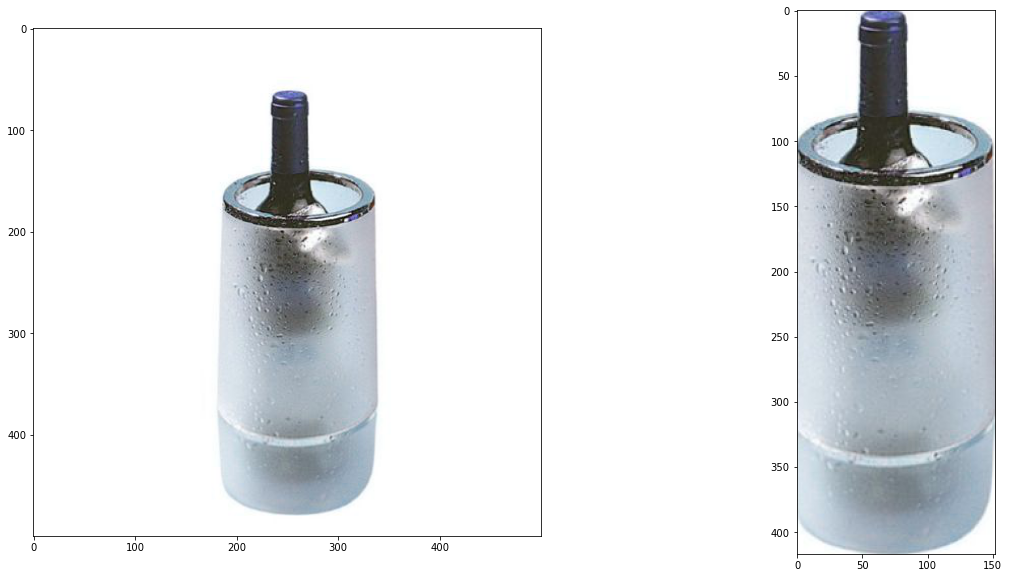

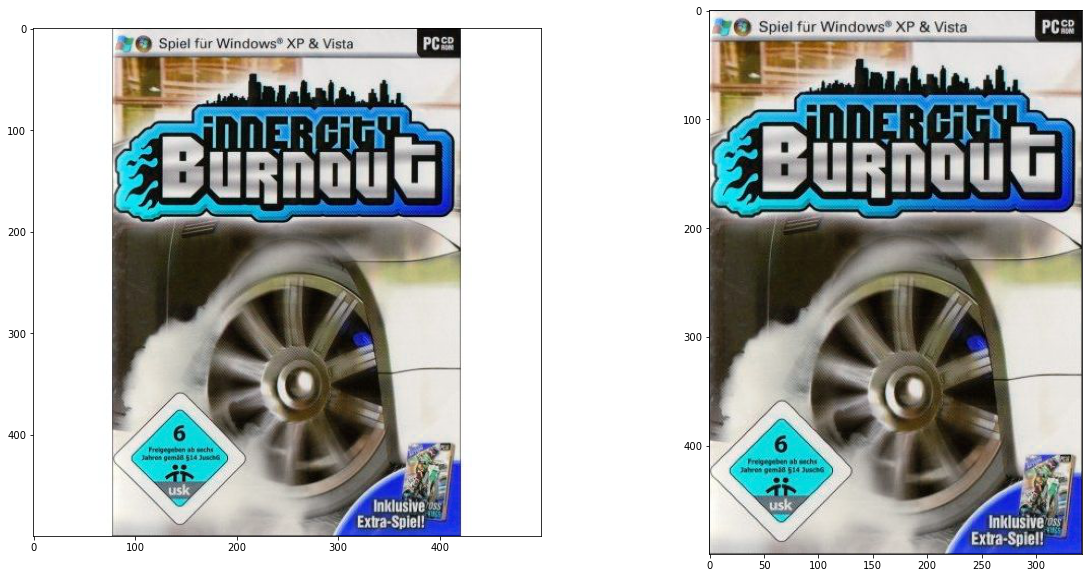

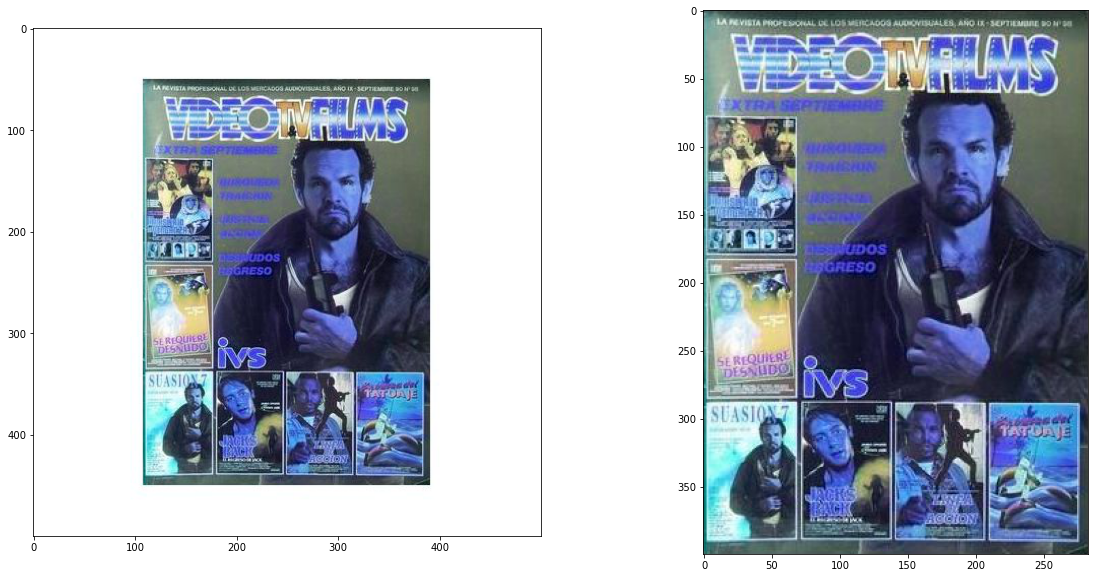

In [25]:
# to find out the right threshold value to obtain a correct image pre-processing 
# with unuseful surrounding white areas suppressed

path_images = r'C:\Users\christophe\Documents\projet_Rakuten\image_train\\'

index = 100
for i in range(3):
    path_complet = path_images + data_train['nom_img'].iloc[index+i]
    img_color = cv2.imread(path_complet, cv2.IMREAD_COLOR) # read the image
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)# convert to grayscale
    gray = 255*(gray < 192).astype(np.uint8) # To invert the text to white 
    #often threshold 128 is used but objects present in some pictures are partially damaged so 192 suits better :-)
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    rect = img_color[y:y+h, x:x+w] # Crop the image - note we do this on the original image

    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    plt.imshow(img_color)
    plt.subplot(122)
    plt.imshow(rect)
    plt.show();


In [26]:
import time
#cell duration 25 mn
path_images_after_processing = r'C:\Users\christophe\Documents\projet_Rakuten\cropped_image_train\\'

start = time.time()

index = 0
for i in range(len(data_train)):
    if ((i == 10000) | (i == 20000) | (i == 30000) | (i == 40000) | (i == 50000) | (i == 60000) | (i == 70000)):
        print("in progress : {0} images over {1} cropped ".format(i,len(data_train)))
    path_complet = path_images + data_train['nom_img'].iloc[index+i]
    img_color = cv2.imread(path_complet, cv2.IMREAD_COLOR) # read the image
    gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)# convert to grayscale
    gray = 255*(gray < 192).astype(np.uint8) # To invert the text to white 
    #often threshold 128 is used but objects present in some pictures are partially damaged so 192 suits better :-)
    coords = cv2.findNonZero(gray) # Find all non-zero points (text)
    x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
    rect = img_color[y:y+h, x:x+w] # Crop the image - note we do this on the original image
    # !!!!!! important choice to keep or not original images !!!!
    cv2.imwrite(path_complet, rect)# save the image (original image lost)
    # 
    #path_complet_new = path_images_after_processing + data_train['nom_img'].iloc[index+i]
    #cv2.imwrite(path_complet_new, rect)# save the image in another directory (keeping original image)
    
end = time.time()
elapsed = round((end - start)/60)

print(f'\ncell execution duration : {elapsed:.2f} mn')


cell execution duration : 25.00 mn


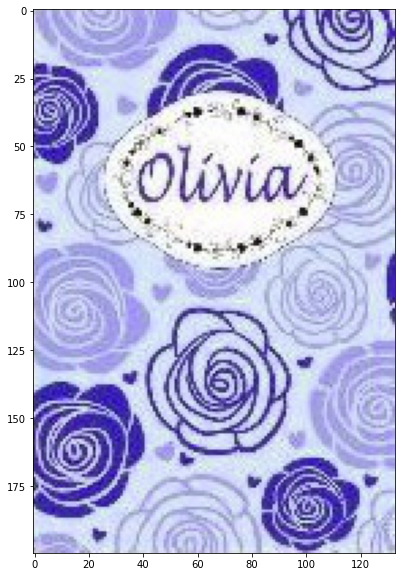

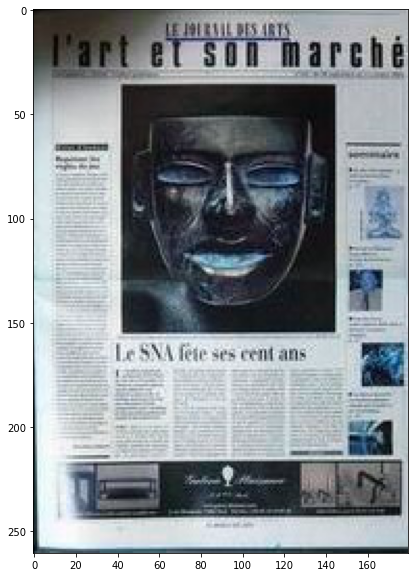

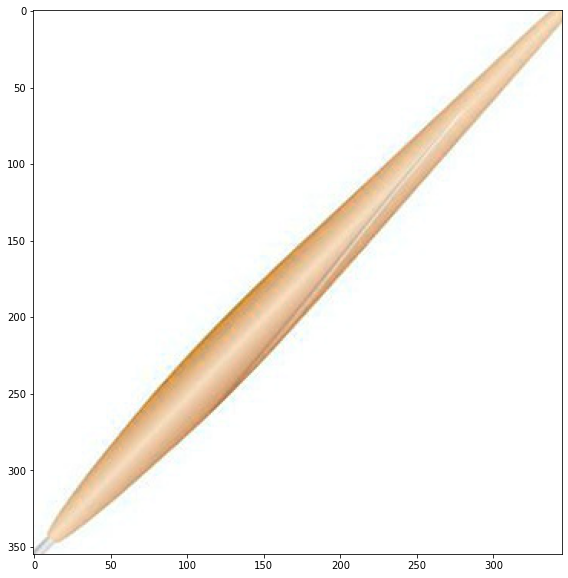

In [40]:
# only display some images

path_images = r'C:\Users\christophe\Documents\projet_Rakuten\image_train\\'

index = 0
for i in range(3):
    path_complet = path_images + data_train['nom_img'].iloc[index+i]
    img_color = cv2.imread(path_complet, cv2.IMREAD_COLOR) # read the image
    plt.figure(figsize=(20, 10))
    plt.imshow(img_color)
    